## Violent Crimes and Unemployment Correlation
### Will a rise or decline in unemployment cause a corresponding rise or decline in number of (violent) crimes reported?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib as plt
%matplotlib inline

C:\Users\KEN\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('crimebystatecombinedwithunemployment.csv')

In [3]:
df.head()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft
0,AL,6.808,1976,3665000,388.8,15.1,21.7,96.0,256.0,3419.5,1170.0,1987.2,262.3
1,AL,7.325,1977,3690000,414.4,14.2,25.2,96.8,278.3,3298.2,1135.5,1881.9,280.7
2,AL,6.380,1978,3742000,419.1,13.3,25.5,99.1,281.2,3519.7,1229.3,1987.9,302.5
3,AL,7.158,1979,3769000,413.3,13.2,27.5,109.5,263.1,3830.5,1287.3,2223.2,320.1
4,AL,8.867,1980,3861466,448.5,13.2,30.0,132.1,273.2,4485.1,1526.7,2642.2,316.2


In [4]:
#df.info()

In [5]:
#df.isnull().sum()

In [6]:
df['property crimes'] = df['Burglary'] + df['Larceny theft'] + df['vehicle theft']

In [7]:
df['violent crimes'] = df['Murder'] + df['rape'] + df['Robbery'] + df['Aggravated assault']

In [8]:
df.head()

,state,unemployment,year,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft,property crimes,violent crimes
0,AL,6.808,1976,3665000,388.8,15.1,21.7,96.0,256.0,3419.5,1170.0,1987.2,262.3,3419.5,388.8
1,AL,7.325,1977,3690000,414.4,14.2,25.2,96.8,278.3,3298.2,1135.5,1881.9,280.7,3298.1,414.5
2,AL,6.380,1978,3742000,419.1,13.3,25.5,99.1,281.2,3519.7,1229.3,1987.9,302.5,3519.7,419.1
3,AL,7.158,1979,3769000,413.3,13.2,27.5,109.5,263.1,3830.5,1287.3,2223.2,320.1,3830.6,413.3
4,AL,8.867,1980,3861466,448.5,13.2,30.0,132.1,273.2,4485.1,1526.7,2642.2,316.2,4485.1,448.5


violent crimes and violent total are very highly correlated. same with poperty total and property crimes. so we can conclude that: 
df['violent total'] = df['Murder'] + df['rape'] + df['Robbery'] + df['Aggravated assault'], and 
df['property total'] = df['Burglary'] + df['Larceny theft'] + df['vehicle theft'].
So we can drop unnecassary columns


In [9]:
df1 = df.drop(columns=['year', 'violent crimes', 'Burglary', 'Larceny theft', 'vehicle theft', 'property total', 'property crimes'])

In [10]:
df1.head()

,state,unemployment,Population,violent total,Murder,rape,Robbery,Aggravated assault
0,AL,6.808,3665000,388.8,15.1,21.7,96.0,256.0
1,AL,7.325,3690000,414.4,14.2,25.2,96.8,278.3
2,AL,6.380,3742000,419.1,13.3,25.5,99.1,281.2
3,AL,7.158,3769000,413.3,13.2,27.5,109.5,263.1
4,AL,8.867,3861466,448.5,13.2,30.0,132.1,273.2


In [11]:
#df2 = df1.groupby('state', as_index=False).sum()
#df2.head()

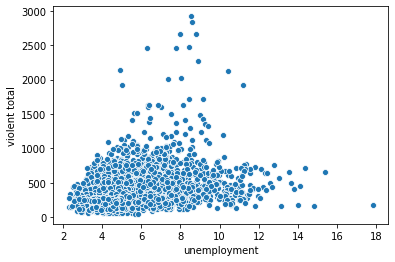

In [12]:
sns.scatterplot(data = df1, x= 'unemployment', y= 'violent total')

In [13]:
np.corrcoef(df['unemployment'], df['violent total'])

array([[1.        , 0.18768275],
       [0.18768275, 1.        ]])

There's a very weak corellation between violent crimeas and unemployment

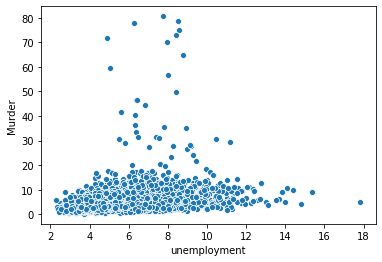

In [14]:
sns.scatterplot(data = df1,  x= 'unemployment', y = 'Murder')#, marker = '*')

In [15]:
np.corrcoef(df['unemployment'], df['Murder'])

array([[1.        , 0.21700158],
       [0.21700158, 1.        ]])

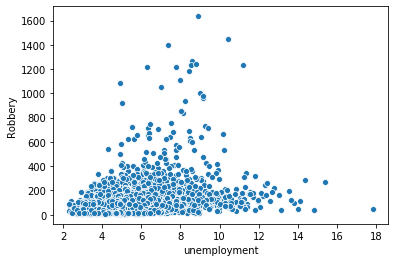

In [16]:
sns.scatterplot(data = df1,  x= 'unemployment', y = 'Robbery')

In [17]:
np.corrcoef(df['unemployment'], df['Robbery'])

array([[1.        , 0.20574281],
       [0.20574281, 1.        ]])

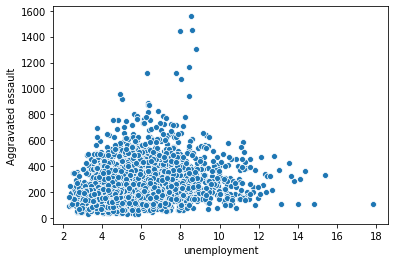

In [18]:
sns.scatterplot(data = df1,  x= 'unemployment', y = 'Aggravated assault')

In [19]:
np.corrcoef(df['unemployment'], df['Aggravated assault'])

array([[1.        , 0.13907966],
       [0.13907966, 1.        ]])

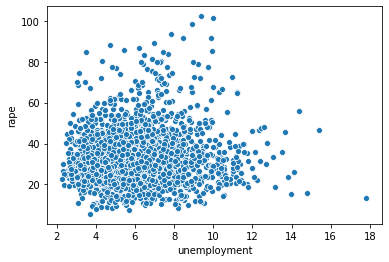

In [20]:
sns.scatterplot(data = df1,  x= 'unemployment', y = 'rape')

In [21]:
np.corrcoef(df['unemployment'], df['rape'])

array([[1.        , 0.06025147],
       [0.06025147, 1.        ]])

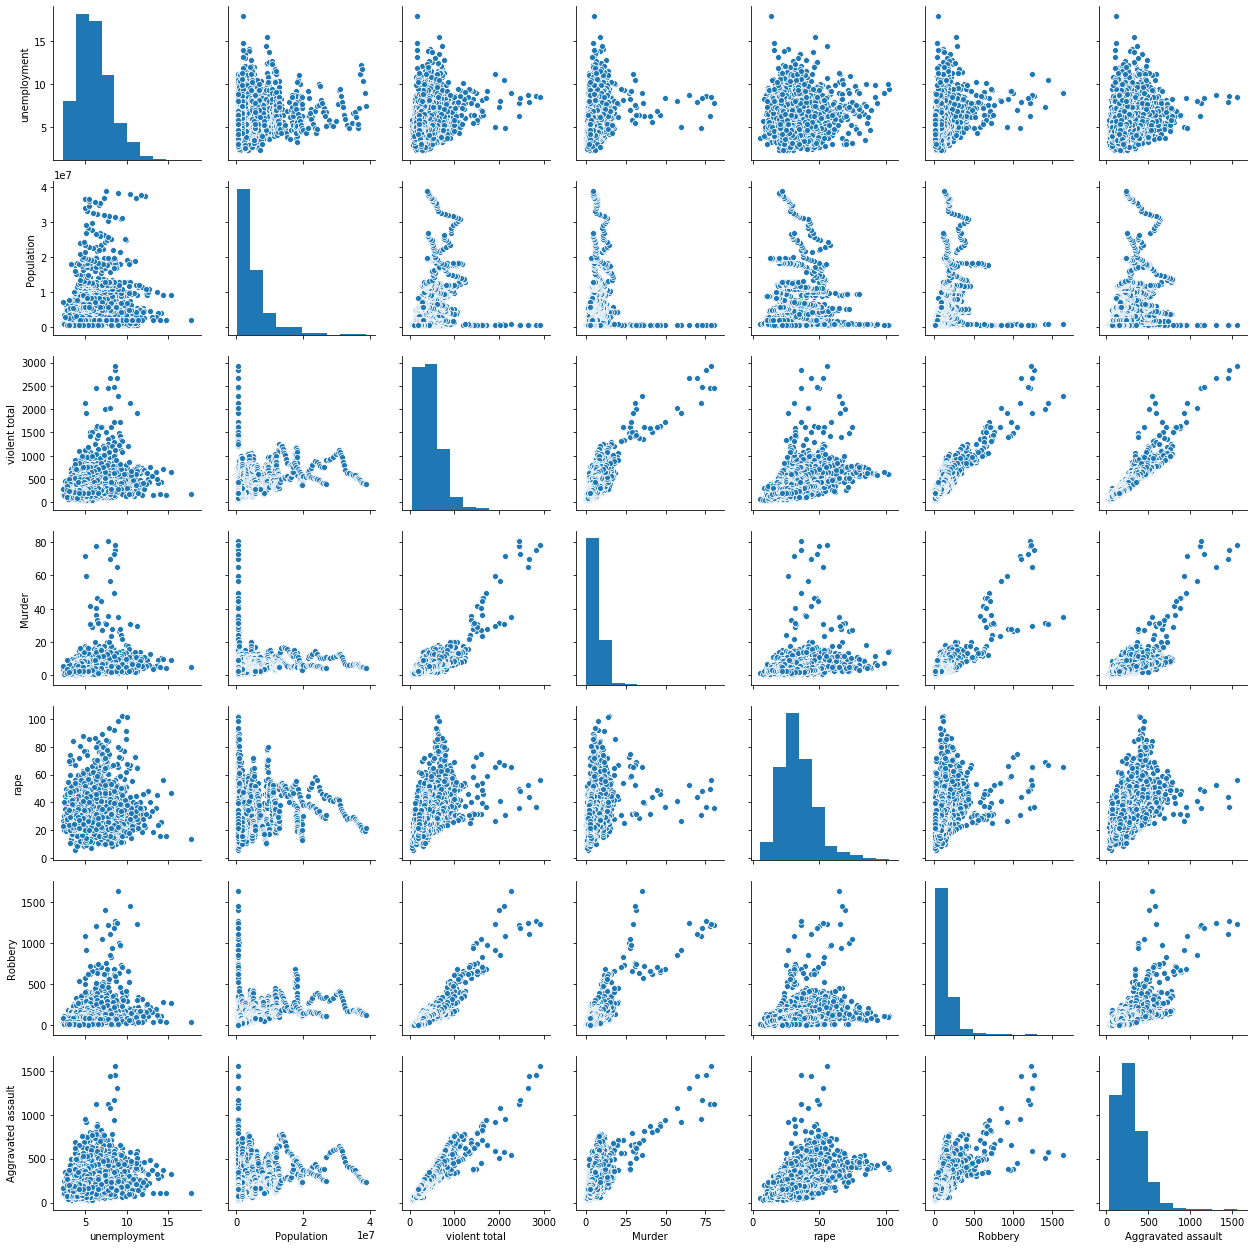

In [22]:
sns.pairplot(df1)

In [23]:
df1.corr()

,unemployment,Population,violent total,Murder,rape,Robbery,Aggravated assault
unemployment,1.000000,0.152197,0.187683,0.217002,0.060251,0.205743,0.139080
Population,0.152197,1.000000,0.227709,0.057036,-0.033619,0.243441,0.191644
violent total,0.187683,0.227709,1.000000,0.827322,0.470626,0.898216,0.923528
Murder,0.217002,0.057036,0.827322,1.000000,0.267419,0.808561,0.702857
rape,0.060251,-0.033619,0.470626,0.267419,1.000000,0.289249,0.495360
Robbery,0.205743,0.243441,0.898216,0.808561,0.289249,1.000000,0.663790
Aggravated assault,0.139080,0.191644,0.923528,0.702857,0.495360,0.663790,1.000000


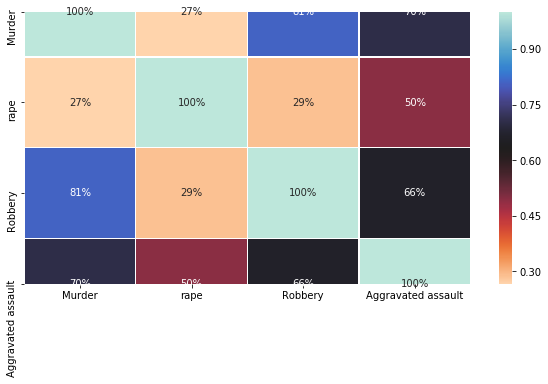

In [24]:
violence = ['Murder', 'rape', 'Robbery', 'Aggravated assault']
x=df[violence]
plt.subplots(figsize=(10, 5))
sns.heatmap(x.corr(), annot = True, fmt='.00%', cmap="icefire_r", robust = True, linewidths=0.35)

In [25]:
#sns.jointplot(x='unemployment', y='violent total', data=df1, kind='reg')

The EDA done on this notebook, we can see that the correlation between unemployment and violent crimes is very weak. So we can conclude that a rise or decline in unemployment does not cause a rise or decline in violent crimes.